In [1]:
#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------

import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

#pipe line
from sklearn.pipeline import Pipeline


In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
count = 0
for col in data.columns[:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            print(col)
            count += 1
print('{} columns need label encoding.' .format(count))

Sex
ExerciseAngina
2 columns need label encoding.


In [11]:
count = 0
for col in data.columns[:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) > 2:
            print(col)
            count += 1
print('{} columns need one hot encoding.' .format(count))

ChestPainType
RestingECG
ST_Slope
3 columns need one hot encoding.


In [13]:
data_numeric = data.select_dtypes(include=['int64', 'float64'])
data_categoric = data.select_dtypes(include=['object'])  

<Figure size 640x480 with 0 Axes>

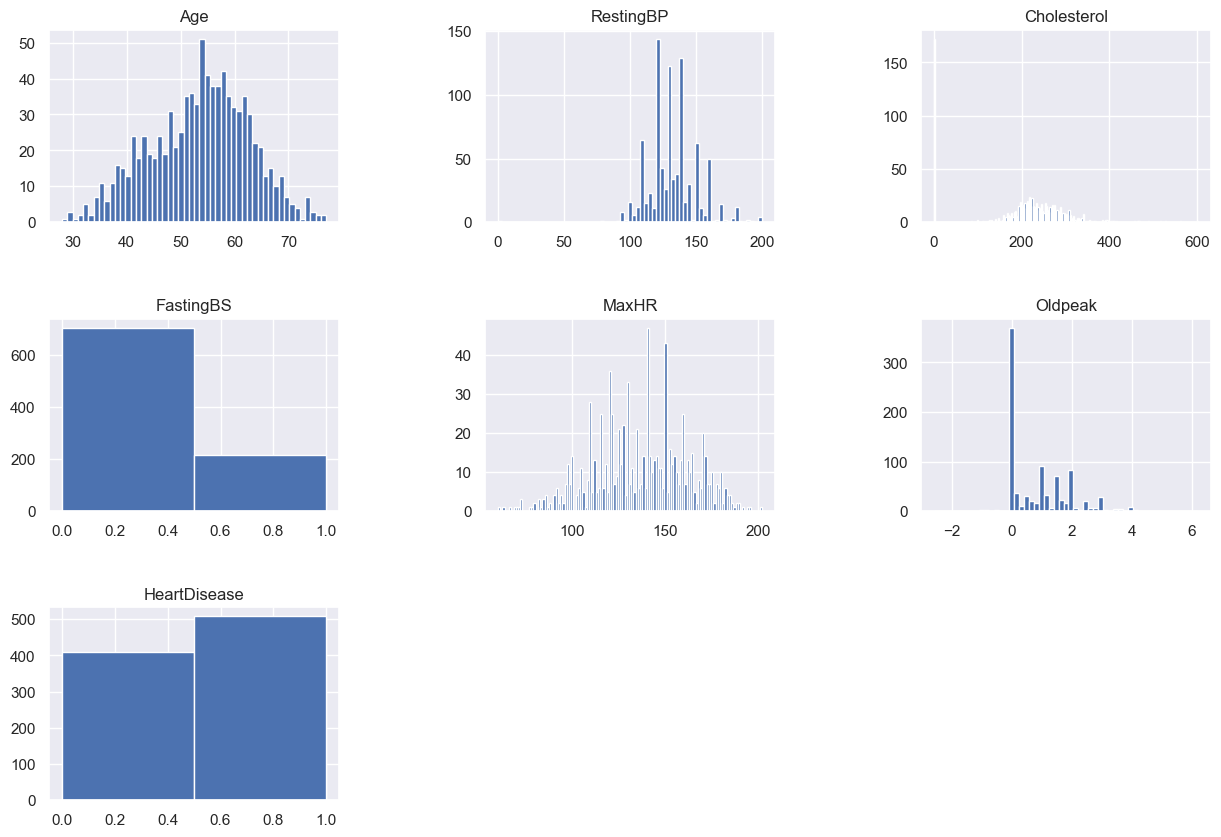

In [15]:
sns.set()
plt.suptitle('Histogram data numeric')

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Mengatur ukuran keseluruhan subplot
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Menambahkan jarak horizontal dan vertikal antara subplot

for i, ax in enumerate(axes.flat):
    if i < data_numeric.shape[1]:
        ax.set_title(data_numeric.columns.values[i])
        bin = np.size(data_numeric.iloc[:, i].unique())
        ax.hist(data_numeric.iloc[:, i], bins=bin)
    else:
        ax.axis('off')  # Menghilangkan subplot yang tidak digunakan

plt.show()



<Figure size 640x480 with 0 Axes>

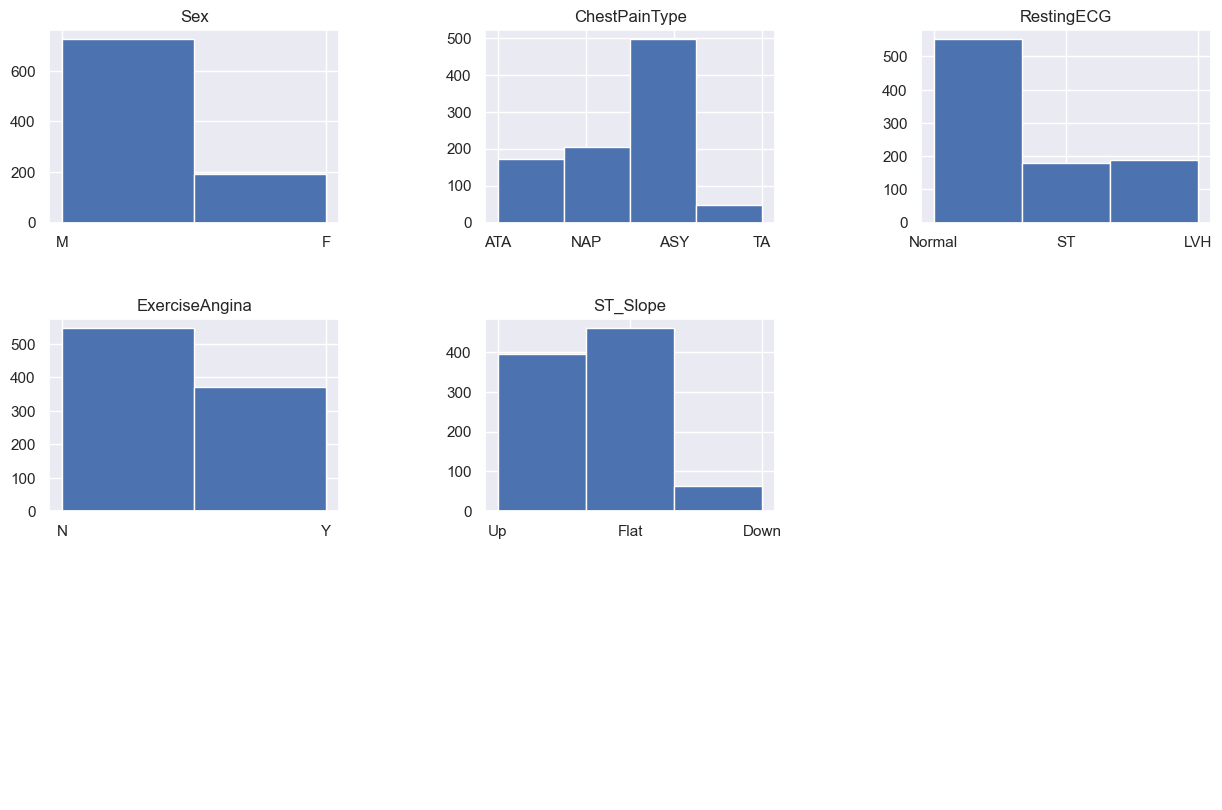

In [16]:
plt.suptitle('Histogram data categoric')

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Mengatur ukuran keseluruhan subplot
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Menambahkan jarak horizontal dan vertikal antara subplot

for i, ax in enumerate(axes.flat):
    if i < data_categoric.shape[1]:
        ax.set_title(data_categoric.columns.values[i])
        bin = np.size(data_categoric.iloc[:, i].unique())
        ax.hist(data_categoric.iloc[:, i], bins=bin)
    else:
        ax.axis('off')  # Menghilangkan subplot yang tidak digunakan

plt.show()

In [24]:
corelation_num = data_numeric.drop(columns = ['HeartDisease'], inplace=False).corrwith(data_numeric.HeartDisease)
#corelation_cat = data_categoric.corrwith(data_numeric['HeartDisease'])

<Axes: title={'center': 'korelasi variabel numerik terhadap gagal jantung'}>

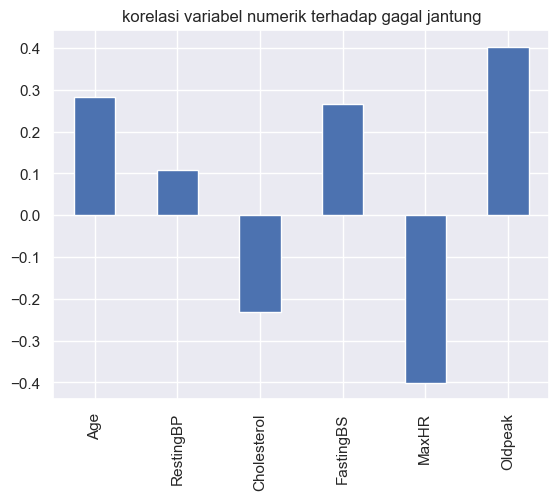

In [21]:
corelation_num.plot.bar(title = 'korelasi variabel numerik terhadap gagal jantung')

<Axes: >

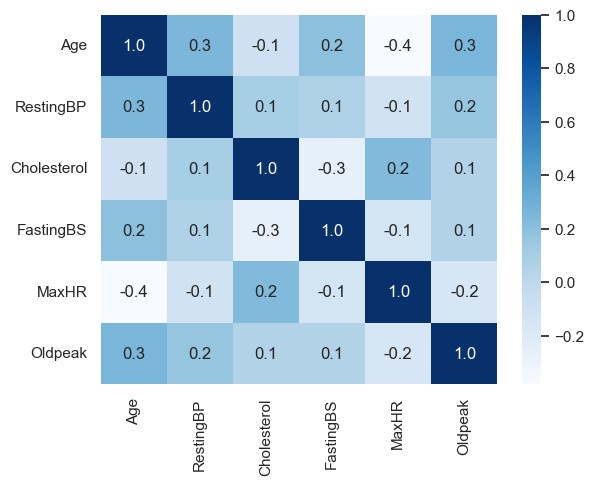

In [25]:
matrix_corr = data_numeric.drop(columns = ['HeartDisease'], inplace=False).corr()
sns.heatmap(matrix_corr,cmap='Blues', annot=True,fmt='.1f')

In [80]:
X = data.drop(columns = ['HeartDisease'])
y = data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   stratify = y,
                                                   random_state = 42)

## Preprocessor

In [86]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

category_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

In [87]:
X.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
dtype: object

In [88]:
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']),
    ('category', category_pipeline, ['Sex','ExerciseAngina','ChestPainType','RestingECG','ST_Slope'])    
])

In [112]:
pipeline1 = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())    
])

In [113]:
pipeline1.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ExerciseAngina',
                                                   'ChestPainType',
                                                   'RestingECG',
                                                   'ST_Slope'])])),
                ('algo', KNeighborsClassifier())])

In [108]:
pipeline1.score(X_test, y_test)

0.8967391304347826

## Hyperparameter Tuning

In [92]:
parameter = {
    'algo__n_neighbors' : range(1,51,2),
    'algo__weights' : ['uniform', 'distance'],
    'algo__p' : [1,2]
}

model1 = GridSearchCV(pipeline, parameter, cv = 3, n_jobs = -1, verbose = 1)
model.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'RestingBP',
                                                                          'Cholesterol',
                                                                          'FastingBS',
                                                                          'MaxHR',
                                                                          'Oldpeak']),
                                                                        ('category',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
                                                                          'ExerciseAngina',
                                                                          'ChestPainType',
                                                                          'RestingECG',
                                                                          'ST_Slope'])])),
                                       ('algo', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'algo__n_neighbors': range(1, 51, 2),
                         'algo__p': [1, 2],
                         'algo__weights': ['uniform', 'distance']},
             verbose=1)

In [93]:
model.best_params_

{'algo__n_neighbors': 27, 'algo__p': 1, 'algo__weights': 'uniform'}

In [94]:
model.score(X_train,y_train),model.score(X_test,y_test)

(0.8705722070844687, 0.907608695652174)

In [96]:
y_pred = model.predict(X_test)

In [98]:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
roc_auc = roc_auc_score(y_test, y_pred)

model_results = pd.DataFrame([['KNN', acc, prec, rec, f1, f2, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score', 'ROC-AUC'])

In [100]:
results = model_results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

  Model  Accuracy  Precision    Recall  F1 Score  F2 Score   ROC-AUC
0   KNN  0.907609   0.904762  0.931373  0.917874  0.925926  0.904711


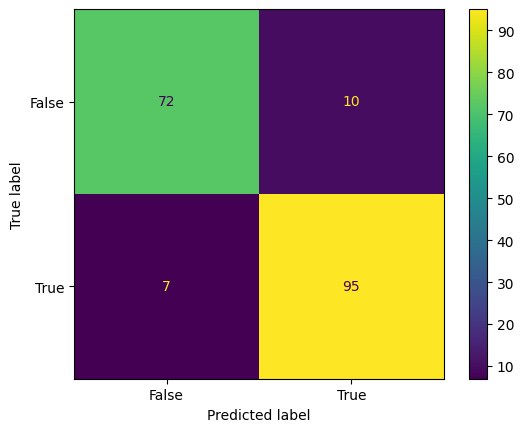

In [101]:
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()